<br><br><br>

<h1 style="text-align:center;">FINTRACK</h1>

<h3 style="text-align:center;">A Smart Expense Tracking and Analytics System</h3>

<br><br>

<p style="text-align:center;">Developed by Yashi Agarwal</p>
<p style="text-align:center;">BCA – Christ University</p>


## Introduction

FinTrack is a Smart Expense Tracking and Analysis System developed using Python and MySQL.

The system allows users to securely register and log in, record daily expenses with classification, analyze spending behavior, visualize financial data using charts, and export records for reporting purposes.

This project demonstrates practical database design, SQL querying, data aggregation, conditional logic, and data visualization in an integrated system.


## Project Modules

The system is divided into the following modules:

1. User Authentication Module  
   - Registration and Login functionality

2. Expense Entry Module  
   - Add expenses with category selection and Good/Bad classification  
   - Smart spending suggestions  
   - View user-specific expenses  

3. Expense Analysis Module  
   - Total spending calculation  
   - Good vs Bad percentage analysis  
   - Financial feedback generation  

4. Visualization Module  
   - Category-wise spending pie chart  
   - Good vs Bad comparison chart  

6. Expense Export Module
   - Export monthly expense data to CSV format


## Database Design

The project uses a relational database named `expense_tracker`.

The database contains two main tables:

1. Users – Stores user information such as name, email, and password.
2. Expenses – Stores expense details such as amount, category, date, and description.

The `expenses` table is linked to the `users` table using a foreign key to ensure that each expense belongs to a specific user.


In [3]:
schema_sql = """
CREATE DATABASE IF NOT EXISTS expense_tracker;
USE expense_tracker;

CREATE TABLE IF NOT EXISTS users (
    user_id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    email VARCHAR(100) UNIQUE NOT NULL,
    password VARCHAR(100) NOT NULL
);

CREATE TABLE IF NOT EXISTS expenses (
    expense_id INT AUTO_INCREMENT PRIMARY KEY,
    user_id INT NOT NULL,
    amount DECIMAL(10,2) NOT NULL,
    category VARCHAR(50) NOT NULL,
    expense_date DATE NOT NULL,
    description VARCHAR(255),
    FOREIGN KEY (user_id) REFERENCES users(user_id)
);
"""
print(schema_sql)



CREATE DATABASE IF NOT EXISTS expense_tracker;
USE expense_tracker;

CREATE TABLE IF NOT EXISTS users (
    user_id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    email VARCHAR(100) UNIQUE NOT NULL,
    password VARCHAR(100) NOT NULL
);

CREATE TABLE IF NOT EXISTS expenses (
    expense_id INT AUTO_INCREMENT PRIMARY KEY,
    user_id INT NOT NULL,
    amount DECIMAL(10,2) NOT NULL,
    category VARCHAR(50) NOT NULL,
    expense_date DATE NOT NULL,
    description VARCHAR(255),
    FOREIGN KEY (user_id) REFERENCES users(user_id)
);



## Connecting Python to MySQL

In this step, I connect my Python notebook to the MySQL database so that the project can store and retrieve user and expense data.


In [8]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Yashi@12345",   
    database="expense_tracker"
)

cursor = db.cursor()
print("✅ Connected to MySQL successfully!")


✅ Connected to MySQL successfully!


## User Authentication Module

In this section, I built a simple authentication system that allows new users to register and existing users to log in.
User credentials are stored in the `users` table, and login validation is done by checking the database records.


In [9]:
def register_user_interactive():
    name = input("Name: ").strip()
    email = input("Email: ").strip()
    password = input("Password: ").strip()
    confirm = input("Confirm Password: ").strip()

    if not name or not email or not password:
        print("❌ Please fill all required fields.")
        return None

    if password != confirm:
        print("❌ Passwords do not match.")
        return None

    try:
        cursor.execute(
            "INSERT INTO users (name, email, password) VALUES (%s, %s, %s)",
            (name, email, password)
        )
        db.commit()
        new_id = cursor.lastrowid
        print(f"✅ Registered successfully! Your user_id is {new_id}")
        return new_id
    except mysql.connector.errors.IntegrityError:
        print("❌ Email already exists. Try logging in.")
        return None


def login_user_interactive():
    email = input("Email: ").strip()
    password = input("Password: ").strip()

    cursor.execute(
        "SELECT user_id, name FROM users WHERE email=%s AND password=%s",
        (email, password)
    )
    user = cursor.fetchone()

    if user:
        print(f"✅ Login successful! Welcome, {user[1]}")
        return user[0]
    else:
        print("❌ Invalid email or password.")
        return None

In [10]:
user_id = register_user_interactive()

✅ Registered successfully! Your user_id is 5


In [15]:
user_id = login_user_interactive()

✅ Login successful! Welcome, keshav


## Displaying Registered Users

In [13]:
import pandas as pd

def show_registered_users():
    cursor.execute("SELECT user_id, name, email FROM users")
    data = cursor.fetchall()

    if not data:
        print("No registered users found.")
        return None

    df = pd.DataFrame(data, columns=["User ID", "Name", "Email"])
    return df

In [14]:
show_registered_users()

,User ID,Name,Email
0,1,Yashi,yashi@gmail.com
1,2,yashi,yashi.agarwal@gmail.com
2,3,yashi,yashi.2gmail.com
3,4,vebhav,vebhav@gmail.com
4,5,keshav,keshav2gmail.com


## Expense Entry Module

In this module, the user can enter and manage daily expenses in a structured way.

Features included:
- Predefined category selection (to avoid errors)
- Automatic date option
- Good/Bad classification
- Smart spending suggestion based on category and amount
- Option to edit or delete an expense
- Display of recent expenses after insertion

This ensures clean data entry and better financial tracking.


In [27]:
from datetime import datetime

def add_expense(user_id):
    amount = float(input("Enter amount: "))

    print("\nSelect Category:")
    print("1. Food")
    print("2. Travel")
    print("3. Bills")
    print("4. Shopping")
    print("5. Other")

    category_choice = input("Choose 1-5: ").strip()

    categories = {
        "1": "Food",
        "2": "Travel",
        "3": "Bills",
        "4": "Shopping",
        "5": "Other"
    }

    if category_choice not in categories:
        print("Invalid category.")
        return

    category = categories[category_choice]

    date_input = input("Enter date (YYYY-MM-DD) or press Enter for today: ").strip()
    if date_input == "":
        date = datetime.today().strftime("%Y-%m-%d")
    else:
        date = date_input

    description = input("Enter description: ").strip()

    print("\nClassify this expense:")
    print("1. Good")
    print("2. Bad")
    choice = input("Choose 1 or 2: ").strip()

    expense_type = "Good" if choice == "1" else "Bad"

    suggestion = ""
    if category == "Bills":
        suggestion = "Bills are usually necessary."
    elif category == "Shopping" and amount > 3000:
        suggestion = "High shopping expense. Consider budgeting."
    elif category == "Food" and amount > 800:
        suggestion = "Food expense seems high."
    elif category == "Travel" and amount > 5000:
        suggestion = "Travel cost is on the higher side."

    cursor.execute("""
        INSERT INTO expenses 
        (user_id, amount, category, expense_date, description, expense_type)
        VALUES (%s, %s, %s, %s, %s, %s)
    """, (user_id, amount, category, date, description, expense_type))

    db.commit()

    print("\nExpense added successfully.")
    if suggestion:
        print("Note:", suggestion)

    cursor.execute("""
        SELECT expense_id, amount, category, expense_date 
        FROM expenses 
        WHERE user_id = %s 
        ORDER BY expense_id DESC 
        LIMIT 5
    """, (user_id,))

    recent = cursor.fetchall()

    print("\nRecent Expenses:")
    for r in recent:
        print(r)

In [39]:
add_expense(user_id)


Select Category:
1. Food
2. Travel
3. Bills
4. Shopping
5. Other

Classify this expense:
1. Good
2. Bad

Expense added successfully.

Recent Expenses:
(6, Decimal('1200.00'), 'Travel', datetime.date(2026, 2, 9))
(5, Decimal('12000.00'), 'Food', datetime.date(2026, 2, 13))
(4, Decimal('1200.00'), 'Bills', datetime.date(2026, 2, 13))


### View Full User Details

This feature allows viewing all details of a specific user 
by entering their user ID. It displays the user’s information 
along with all the expenses entered by that user.


In [19]:
def view_full_user_profile():
    user_id = int(input("Enter User ID: "))

    cursor.execute("SELECT name, email FROM users WHERE user_id = %s", (user_id,))
    user = cursor.fetchone()

    if not user:
        print("No user found with this ID.")
        return

    print("\nUser Details")
    print("Name:", user[0])
    print("Email:", user[1])

    cursor.execute("""
        SELECT amount, category, expense_date, description, expense_type
        FROM expenses
        WHERE user_id = %s
    """, (user_id,))

    expenses = cursor.fetchall()

    if not expenses:
        print("\nNo expenses found for this user.")
        return

    print("\nExpense Records")
    for e in expenses:
        print(f"{e[0]} | {e[1]} | {e[2]} | {e[3]} | {e[4]}")

In [20]:
view_full_user_profile()


User Details
Name: keshav
Email: keshav2gmail.com

Expense Records
1200.00 | Bills | 2026-02-13 |  | Good


## Expense Analysis Module

In this module, the system analyzes a user’s spending based on the stored expense records.

It calculates:
- Total spending
- Category-wise spending
- Good vs Bad spending

Based on the results, the system gives simple feedback to help the user understand their spending habits.


In [24]:
def analyze_user_expenses(user_id):
    cursor.execute("""
        SELECT SUM(amount) 
        FROM expenses 
        WHERE user_id = %s
    """, (user_id,))
    
    total = cursor.fetchone()[0]

    if total is None:
        print("No expenses found for analysis.")
        return

    cursor.execute("""
        SELECT expense_type, SUM(amount)
        FROM expenses
        WHERE user_id = %s
        GROUP BY expense_type
    """, (user_id,))
    
    data = cursor.fetchall()

    summary = {row[0]: row[1] for row in data}

    good_total = summary.get("Good", 0)
    bad_total = summary.get("Bad", 0)

    print("\nExpense Analysis")
    print("Total Spending:", total)
    print("Good Spending:", good_total)
    print("Bad Spending:", bad_total)

    if total > 0:
        bad_percentage = (bad_total / total) * 100
        print(f"Bad Spending Percentage: {bad_percentage:.2f}%")

        if bad_percentage <= 30:
            print("🟢 Your spending is well balanced.")
        elif bad_percentage <= 60:
            print("🟡 Moderate unnecessary spending. Monitor it.")
        else:
            print("🔴 High unnecessary spending. Consider reducing it.")

In [29]:
analyze_user_expenses(user_id)


Expense Analysis
Total Spending: 13200.00
Good Spending: 1200.00
Bad Spending: 12000.00
Bad Spending Percentage: 90.91%
🔴 High unnecessary spending. Consider reducing it.


## Visualization Module

In this module, the system visualizes the user’s spending data 
using charts for better understanding.

It displays:
- Category-wise spending distribution
- Good vs Bad expense comparison


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def category_pie_chart(user_id):
    cursor.execute("""
        SELECT category, SUM(amount)
        FROM expenses
        WHERE user_id = %s
        GROUP BY category
    """, (user_id,))
    
    data = cursor.fetchall()

    if not data:
        print("No data available for visualization.")
        return

    df = pd.DataFrame(data, columns=["Category", "Total"])
    df["Total"] = pd.to_numeric(df["Total"], errors="coerce")
    df = df.dropna()

    if df.empty:
        print("No numeric totals found to plot.")
        return

    df = df.set_index("Category")
    df["Total"].plot(kind="pie", autopct="%1.1f%%")
    plt.title("Category-wise Spending")
    plt.ylabel("")
    plt.show()

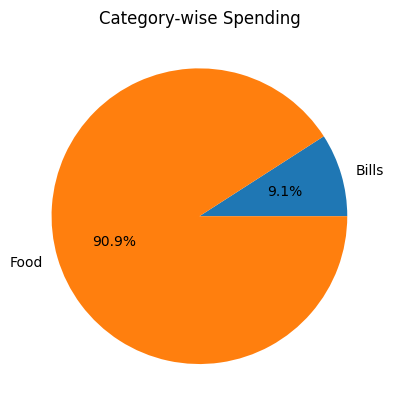

In [33]:
category_pie_chart(user_id)

In [34]:
def good_bad_pie_chart(user_id):
    cursor.execute("""
        SELECT expense_type, SUM(amount)
        FROM expenses
        WHERE user_id = %s
        GROUP BY expense_type
    """, (user_id,))
    
    data = cursor.fetchall()

    if not data:
        print("No data available.")
        return

    df = pd.DataFrame(data, columns=["Type", "Total"])
    df["Total"] = pd.to_numeric(df["Total"], errors="coerce")
    df = df.dropna()

    if df.empty:
        print("No numeric data to plot.")
        return

    df = df.set_index("Type")
    df["Total"].plot(kind="pie", autopct="%1.1f%%")
    plt.title("Good vs Bad Spending")
    plt.ylabel("")
    plt.show()

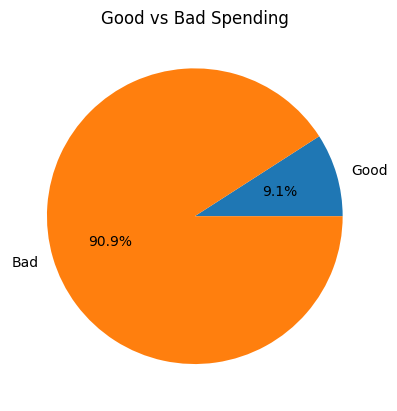

In [35]:
good_bad_pie_chart(user_id)

## Expense Export Module

In this module, the user can export their expense records into a CSV file.
This helps in keeping a backup and also allows further analysis outside the system.


In [46]:
import pandas as pd

def export_user_expenses_to_csv(user_id):
    cursor.execute("""
        SELECT expense_id, amount, category, expense_date, description, expense_type
        FROM expenses
        WHERE user_id = %s
        ORDER BY expense_date DESC
    """, (user_id,))

    data = cursor.fetchall()

    if not data:
        print("No expenses found to export.")
        return None

    df = pd.DataFrame(
        data,
        columns=["Expense ID", "Amount", "Category", "Date", "Description", "Type"]
    )

    df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

    filename = f"fintrack_user_{user_id}_expenses.csv"
    df.to_csv(filename, index=False)

    print("CSV exported successfully:", filename)
    return filename


In [47]:
export_user_expenses_to_csv(user_id)


CSV exported successfully: fintrack_user_5_expenses.csv


'fintrack_user_5_expenses.csv'

In [48]:
uid = int(input("Enter User ID: "))
export_user_expenses_to_csv(uid)


CSV exported successfully: fintrack_user_5_expenses.csv


'fintrack_user_5_expenses.csv'

## Project Summary

FinTrack is a Smart Expense Tracking and Analysis System developed using Python and MySQL.

The system enables users to securely register and log in, record expenses with structured category selection, classify spending as Good or Bad, and receive intelligent financial feedback. It also allows users to analyze total and categorized spending, visualize financial patterns using charts, and export expense records in CSV format.

Through this project, practical concepts of relational database design, SQL querying, data aggregation, conditional logic, and data visualization were implemented in an integrated and structured manner.


## Conclusion

The FinTrack system successfully demonstrates the integration of backend database management with analytical and visualization capabilities.

By combining secure authentication, structured data storage, real-time financial analysis, and export functionality, the system provides a comprehensive solution for managing personal expenses.

This project highlights the practical application of database management systems, Python programming, and data analysis techniques, and serves as a strong foundation for further enhancements such as budgeting features, monthly comparisons, and web-based interfaces.
